In [1]:
# Importing Library
import pandas as pd
import numpy as np

In [72]:
# faching data from housing csv
housing_data = pd.read_csv('housing/housing.csv')

In [73]:
# printing top 5 records from the datafarmes
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [74]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [75]:
# chaking shape of data from output no of row and column
housing_data.shape

(20640, 10)

In [76]:
# return count, mean, standard deviation
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [77]:
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

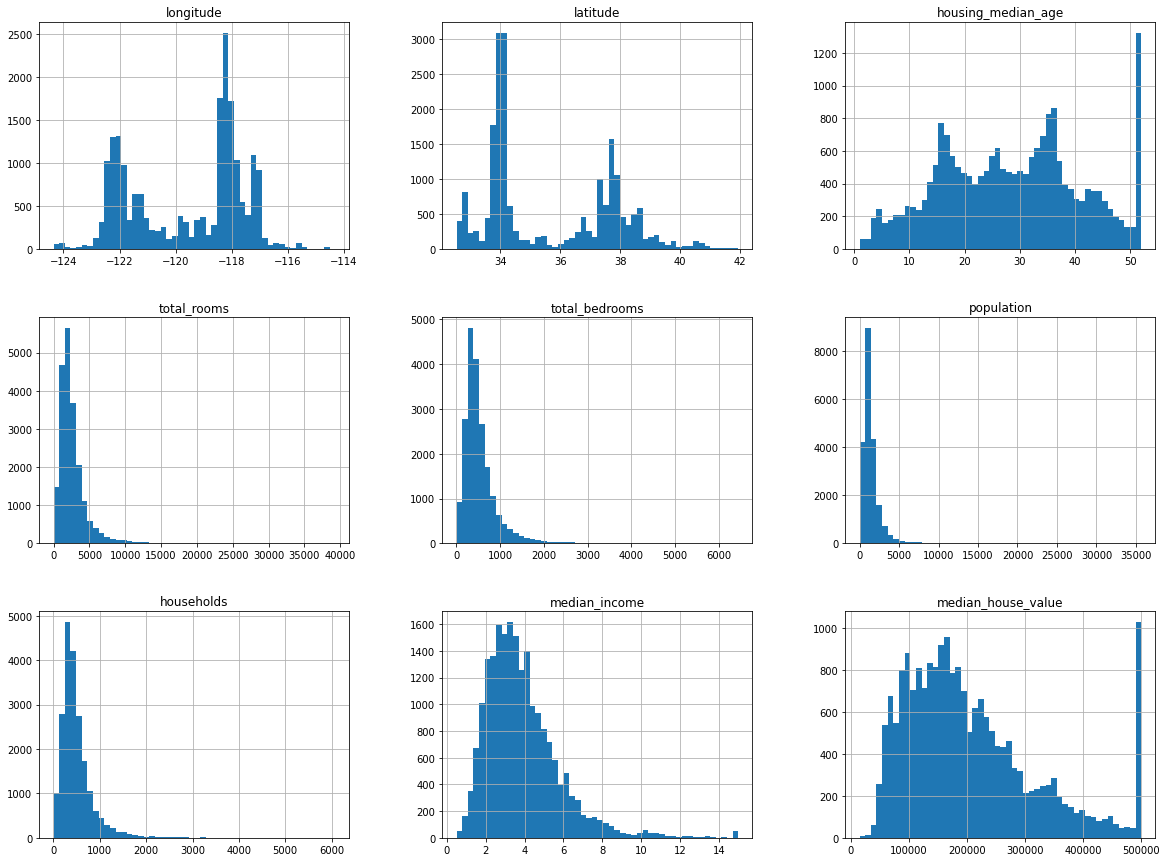

In [78]:
# importing Matpolt lib for ploting a graph
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

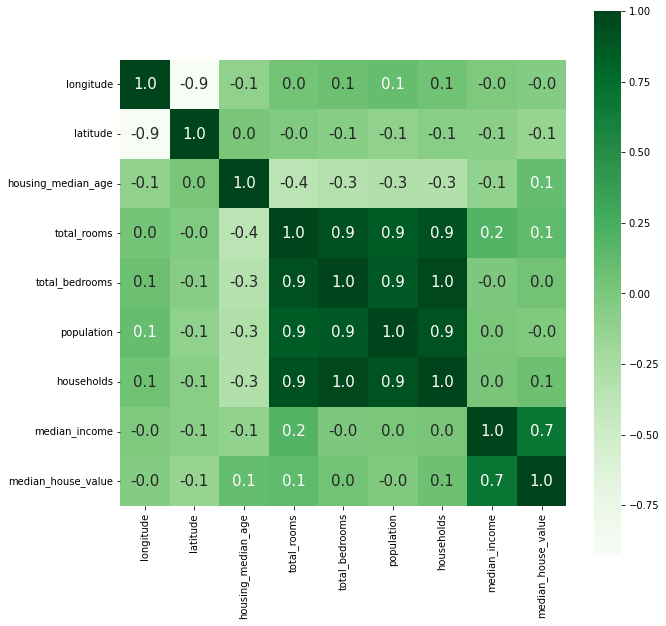

In [111]:
# import seaborn for correlation heat map
import seaborn as sns
corr = housing_data.corr()
corr.shape
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [80]:
# Checking for null records
housing_data.isnull().sum()

In [81]:
# Drop the null data
housing_data = housing_data.dropna()

In [82]:
# Checking shape of data after drop null column
housing_data.shape

In [83]:
# Check null records after cleaning null data
housing_data.isnull().sum()

<AxesSubplot:>

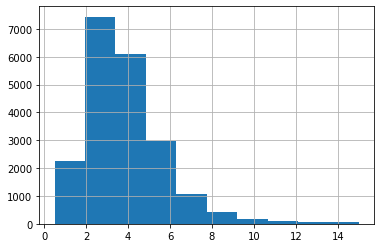

In [87]:
# histogram for median income.
housing_data["median_income"].hist()

In [88]:
# here using cuts making a group based on median income.
housing_data['income_cat'] = pd.cut(x = housing_data['median_income'],
                        bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf],
                        labels = [1, 2, 3, 4, 5])

In [89]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

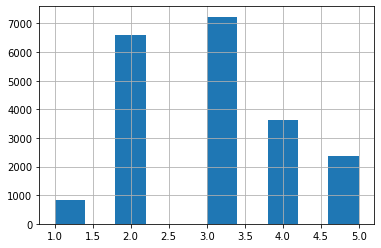

In [90]:
housing_data["income_cat"].hist()

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

In [92]:
# Spliting record for training and testing set

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    
                                                strat_train_set = housing_data.loc[train_index]
        
                                                strat_test_set = housing_data.loc[test_index]

In [97]:
def feature_engineering(data):
    data["rooms_per_household"] = data["total_rooms"]/data["households"]
    data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
    data["population_per_household"]=data["population"]/data["households"]
    return data

In [106]:
def data_transformation(data):    
    # Seperate Labels
    if 'median_house_value' in data.columns:
        labels = data['median_house_value']
        data = data.drop('median_house_value', axis = 1)        
    else:        
        labels = None        
    # Feature Engineering
    fed = feature_engineering(data)
    features = fed.columns.to_list()
    features.remove('ocean_proximity')
    fedc = fed['ocean_proximity'].copy()
    fed = fed.drop('ocean_proximity', axis = 1) 
    # Handling Missing Values
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(strategy='median')
    data_imp = imp.fit_transform(fed)        
    # Scaling/Normalizing Data
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    scaled_data = sc.fit_transform(data_imp)
        
    # Encoding Categorical Variables
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder(sparse=False)
    arr = fedc.values
    arr = arr.reshape(-1, 1)
    data_e = enc.fit_transform(arr)
    features = features + enc.categories_[0].tolist()
    
    output = np.hstack((scaled_data, data_e))
    
    return output, labels, features

In [107]:
train_data, train_labels, features = data_transformation(strat_train_set)

In [100]:
pd.DataFrame(train_data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687,0.017395,-0.122484,0.006223,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078,0.569256,-0.911663,-0.040811,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687,-0.018024,-0.370939,-0.075371,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687,-0.595140,1.115873,-0.106803,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432,0.251241,-0.526821,0.006109,1.0,0.0,0.0,0.0,0.0


In [101]:
train_labels[:8]

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
1481     165700.0
18125    412300.0
5830     349600.0
Name: median_house_value, dtype: float64

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(train_data, train_labels)   

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  10.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.7s
[CV] END ..............................C=10.0, kernel=linear; total time=  10.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.8s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.7s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.2s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.0s
[CV] END .............................C=100.0, kernel=linear; total time=  10.6s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [109]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

69532.49795543445

In [110]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [1]:
kruepsh_5_ = 50
kruepsh_5_

50

In [2]:
10//3.0


3.0

In [16]:
price = 0.0
total_price = 0.0
count = 0
def read_book_price():
    global count
    global total_price
    price = float(input("enter Price of Book"))
    if price < 0:
        print(f'Total Price : {total_price}')
        print(f'Average Price : {total_price/count}')
        if total_price < 80:
            discount = 0 
            print(f'Total Discount : {discount}')
            print(f'Total Price after Discount : {total_price - discount}')
        elif total_price > 80 and total_price < 160:
            discount = total_price * 0.15
            print(f'Total Discount : {discount}')
            print(f'Total Price after Discount : {total_price - discount}')
        
        elif total_price > 160:
            discount = total_price * 0.20
            print(f'Total Discount : {discount}')
            print(f'Total Price after Discount : {total_price - discount}')

    else:
        count = count + 1
        total_price = total_price + price
        read_book_price()

read_book_price()

Total Price : 300.0
Average Price : 100.0
Total Discount : 60.0
Total Price after Discount : 240.0


ModuleNotFoundError: No module named 'sklearn'